# LoC thresholding notebook

This notebook loads a set of Z-tracks taken across an image volume from the lung-on-a-chip project and thresholds positive/negative expression of set markers based on a manual and unbiased assessment of the underlying images:

1. Load z-tracks, segmentation and images.
2. Initiate a Napari viewer with key bindings to annotate positive/negative expressing cells
3. Assess results
4. Quantify based on manually chosen thresholds

In [60]:
import btrack # import tracking software
import napari # image viewer
from skimage import io # image loader and viewer
import os # for filename manipulations
import glob # for more fn operations 
import pandas as pd # module for data org 
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # module for plotting
sns.set(font='Nimbus Sans', style = 'white') # my favourite formatting :)
sns.set_palette('PiYG') # my favourite colours :D 

## 1. Load images and labels

In [7]:
image_fn = '/mnt/DATA/lung_on_chip/monolayer/21-12-031B/122/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_122.vsi - 014 CF405, CF488, CF561, CF638.tif'
image = io.imread(image_fn) # load image

In [8]:
# set filename
labels_fn = '/mnt/DATA/lung_on_chip/monolayer/21-12-031B/122/z_tracks_masks.h5'
# load labels (tracks and segmentation)
with btrack.io.HDF5FileHandler(labels_fn, 
                                   'r', 
                                   obj_type='obj_type_1'
                                   ) as reader:
        tracks = reader.tracks
        segmentation = reader.segmentation
napari_tracks, properties, graph = btrack.utils.tracks_to_napari(tracks, ndim = 2)

[INFO][2023/07/21 02:47:43 PM] Opening HDF file: /mnt/DATA/lung_on_chip/monolayer/21-12-031B/122/z_tracks_masks.h5...
[INFO][2023/07/21 02:47:43 PM] Loading tracks/obj_type_1
[INFO][2023/07/21 02:47:43 PM] Loading LBEP/obj_type_1
[INFO][2023/07/21 02:47:43 PM] Loading objects/obj_type_1 (48519, 5) (48519 filtered: None)
[INFO][2023/07/21 02:47:47 PM] Loading segmentation (81, 2304, 2304)
[INFO][2023/07/21 02:47:47 PM] Closing HDF file: /mnt/DATA/lung_on_chip/monolayer/21-12-031B/122/z_tracks_masks.h5


## 2. Initiate a napari session with key bindings

In [103]:
output_dir = os.path.dirname(image_fn)

In [30]:
viewer = napari.Viewer()

viewer.add_image(image, channel_axis=-1)
track_layer = viewer.add_tracks(napari_tracks, tail_length=0, visible = False)
labels = viewer.add_labels(segmentation)
labels.contour = 1 # this makes all the masks into outlines but might slow your computer down A LOT (comment out line if so) 

@viewer.bind_key('t')
def ch1_extract_positive_pixel_value(event=None):
    ### extract cell ID under cursor
    cell_ID = track_layer._get_value(position=viewer.cursor.position)
    ### get time frame
    time = viewer.cursor.position[0]
    try:
        positive_track = [track for track in tracks if track.ID == cell_ID][0]
    except:
        print('Looks like there was no identifiable track there')
    ### get index of cell instance of selected frame
    cell_index = positive_track.t.index(time)
    ### extract the pixel intensity of that segment
    px_int =  positive_track['mean_intensity'][:,1][cell_index]
    ### write to output file
    with open(os.path.join(output_dir, "ch1_positive.csv"),"a") as f:
        f.write(f"{px_int}\n")
    with open(os.path.join(output_dir, "ch1_positive_details.csv"),"a") as f:
        f.write(f"{cell_ID, time, px_int}\n")
@viewer.bind_key('b')
def ch1_extract_negative_pixel_value(event=None):
    ### extract cell ID under cursor
    cell_ID = track_layer._get_value(position=viewer.cursor.position)
    ### get time frame
    time = viewer.cursor.position[0]
    try:
        positive_track = [track for track in tracks if track.ID == cell_ID][0]
    except:
        print('Looks like there was no identifiable track there')
    ### get index of cell instance of selected frame
    cell_index = positive_track.t.index(time)
    ### extract the pixel intensity of that segment
    px_int =  positive_track['mean_intensity'][:,1][cell_index]
    ### write to output file
    with open(os.path.join(output_dir, "ch1_negative.csv"),"a") as f:
        f.write(f"{px_int}\n")
    with open(os.path.join(output_dir, "ch1_negative_details.csv"),"a") as f:
        f.write(f"{cell_ID, time, px_int}\n")

@viewer.bind_key('p')
def ch2_extract_positive_pixel_value(event=None):
    ### extract cell ID under cursor
    cell_ID = track_layer._get_value(position=viewer.cursor.position)
    ### get time frame
    time = viewer.cursor.position[0]
    try:
        positive_track = [track for track in tracks if track.ID == cell_ID][0]
    except:
        print('Looks like there was no identifiable track there')
    ### get index of cell instance of selected frame
    cell_index = positive_track.t.index(time)
    ### extract the pixel intensity of that segment
    px_int =  positive_track['mean_intensity'][:,2][cell_index]
    ### write to output file
    with open(os.path.join(output_dir, "ch2_positive.csv"),"a") as f:
        f.write(f"{px_int}\n")
    with open(os.path.join(output_dir, "ch2_positive_details.csv"),"a") as f:
        f.write(f"{cell_ID, time, px_int}\n")
@viewer.bind_key('n')
def ch2_extract_negative_pixel_value(event=None):
    ### extract cell ID under cursor
    cell_ID = track_layer._get_value(position=viewer.cursor.position)
    ### get time frame
    time = viewer.cursor.position[0]
    try:
        positive_track = [track for track in tracks if track.ID == cell_ID][0]
    except:
        print('Looks like there was no identifiable track there')
    ### get index of cell instance of selected frame
    cell_index = positive_track.t.index(time)
    ### extract the pixel intensity of that segment
    px_int =  positive_track['mean_intensity'][:,2][cell_index]
    ### write to output file
    with open(os.path.join(output_dir, "ch2_negative.csv"),"a") as f:
        f.write(f"{px_int}\n")
    with open(os.path.join(output_dir, "ch2_negative_details.csv"),"a") as f:
        f.write(f"{cell_ID, time, px_int}\n")


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/layers/tracks/tracks.py:312: RuntimeWarning: divide by zero encountered in true_divide
  alpha = (self.head_length + self.current_time - times) / (
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/layers/tracks/tracks.py:312: RuntimeWarning: divide by zero encountered in true_divide
  alpha = (self.head_length + self.current_time - times) / (
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/layers/tracks/tracks.py:312: RuntimeWarning: invalid value encountered in true_divide
  alpha = (self.head_length + self.current_time - times) / (
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/layers/tracks/tracks.py:312: RuntimeWarning: divide by zero encountered in true_divide
  alpha = (self.head_length + self.current_time - times) / (
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/layers/tracks/tracks.py:312: RuntimeWarning: invalid value encountered in 

## Load results of unbiased thresholding

Loading many single-cell measurements of positive and negative cells to decide where the threshold between them is (simply by plotting and deciding at the moment).

In [108]:
df = dict()
channels = ['ch1', 'ch2']
for channel in channels:
    for fn in glob.glob(os.path.join(output_dir, f'{channel}*.csv')):
        if 'positive.' in fn:
            positive_df = pd.read_csv(fn, names=[f'Positive mean pixel intensity {channel}'])
        if 'negative.' in fn:
            negative_df = pd.read_csv(fn, names=[f'Negative mean pixel intensity {channel}'])
    df[channel] = pd.concat((negative_df, positive_df), axis = 1)

Text(0.5, 1.0, 'Positive/negative pixel distribution across ch1')

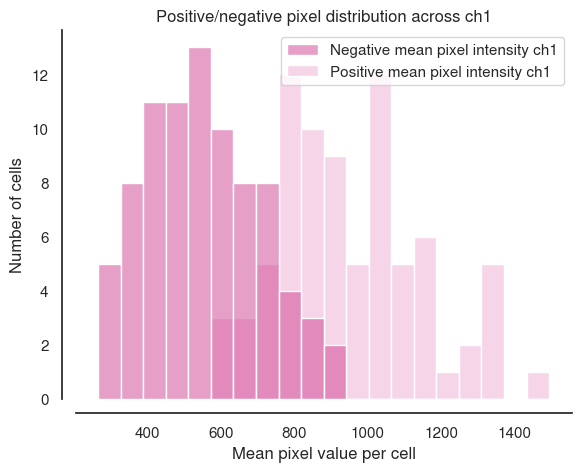

In [109]:
channel = 'ch1'
sns.histplot(data = df[channel], bins = 20)
sns.despine(offset = 10)
plt.xlabel('Mean pixel value per cell')
plt.ylabel('Number of cells')
plt.title(f'Positive/negative pixel distribution across {channel}')